In [1]:
import numpy as np
from src.simglucose.rewards import shaped_reward_around_normal_bg, shaped_negative_reward_around_normal_bg, no_negativity, no_negativityV2, partial_negativity, partial_negativityV2, smooth_reward, tan_reward, uniform_reward_regions, uniform_reward_with_risk
import pandas as pd
from matplotlib import pyplot as plt

In [2]:


reward_functions = [shaped_reward_around_normal_bg, shaped_negative_reward_around_normal_bg, no_negativity, no_negativityV2, partial_negativity, partial_negativityV2, smooth_reward, tan_reward, uniform_reward_regions, uniform_reward_with_risk]
reward_function_names = list(map(lambda x:x.__name__, reward_functions))

bg_range = np.array(range(60,320))
bg_range = np.expand_dims(bg_range, axis=1)

reward_mapped  = {name:list(map(fn,bg_range)) for name, fn in zip(reward_function_names, reward_functions)}
reward_mapped['bg_range'] = bg_range.squeeze(axis=1)

In [3]:
df = pd.DataFrame.from_dict(reward_mapped).set_index('bg_range')


In [4]:
df.head()

,shaped_reward_around_normal_bg,shaped_negative_reward_around_normal_bg,no_negativity,no_negativityV2,partial_negativity,partial_negativityV2,smooth_reward,tan_reward,uniform_reward_regions,uniform_reward_with_risk
bg_range,,,,,,,,,,
60,-10.031310,-1.0,0.003,-0.015534,-0.015534,-1.20,-1.0,-0.028535,-0.1,-0.045235
61,-10.028347,-1.0,0.003,-0.014074,-0.014074,-1.18,-1.0,-0.028095,-0.1,-0.042902
62,-10.025349,-1.0,0.003,-0.012595,-0.012595,-1.16,-1.0,-0.027639,-0.1,-0.040666
63,-10.022315,-1.0,0.003,-0.011096,-0.011096,-1.14,-1.0,-0.027167,-0.1,-0.038524
64,-10.019245,-1.0,0.003,-0.009577,-0.009577,-1.12,-1.0,-0.026678,-0.1,-0.036471


array([<Axes: xlabel='bg_range'>, <Axes: xlabel='bg_range'>,
       <Axes: xlabel='bg_range'>, <Axes: xlabel='bg_range'>,
       <Axes: xlabel='bg_range'>, <Axes: xlabel='bg_range'>,
       <Axes: xlabel='bg_range'>, <Axes: xlabel='bg_range'>,
       <Axes: xlabel='bg_range'>, <Axes: xlabel='bg_range'>], dtype=object)

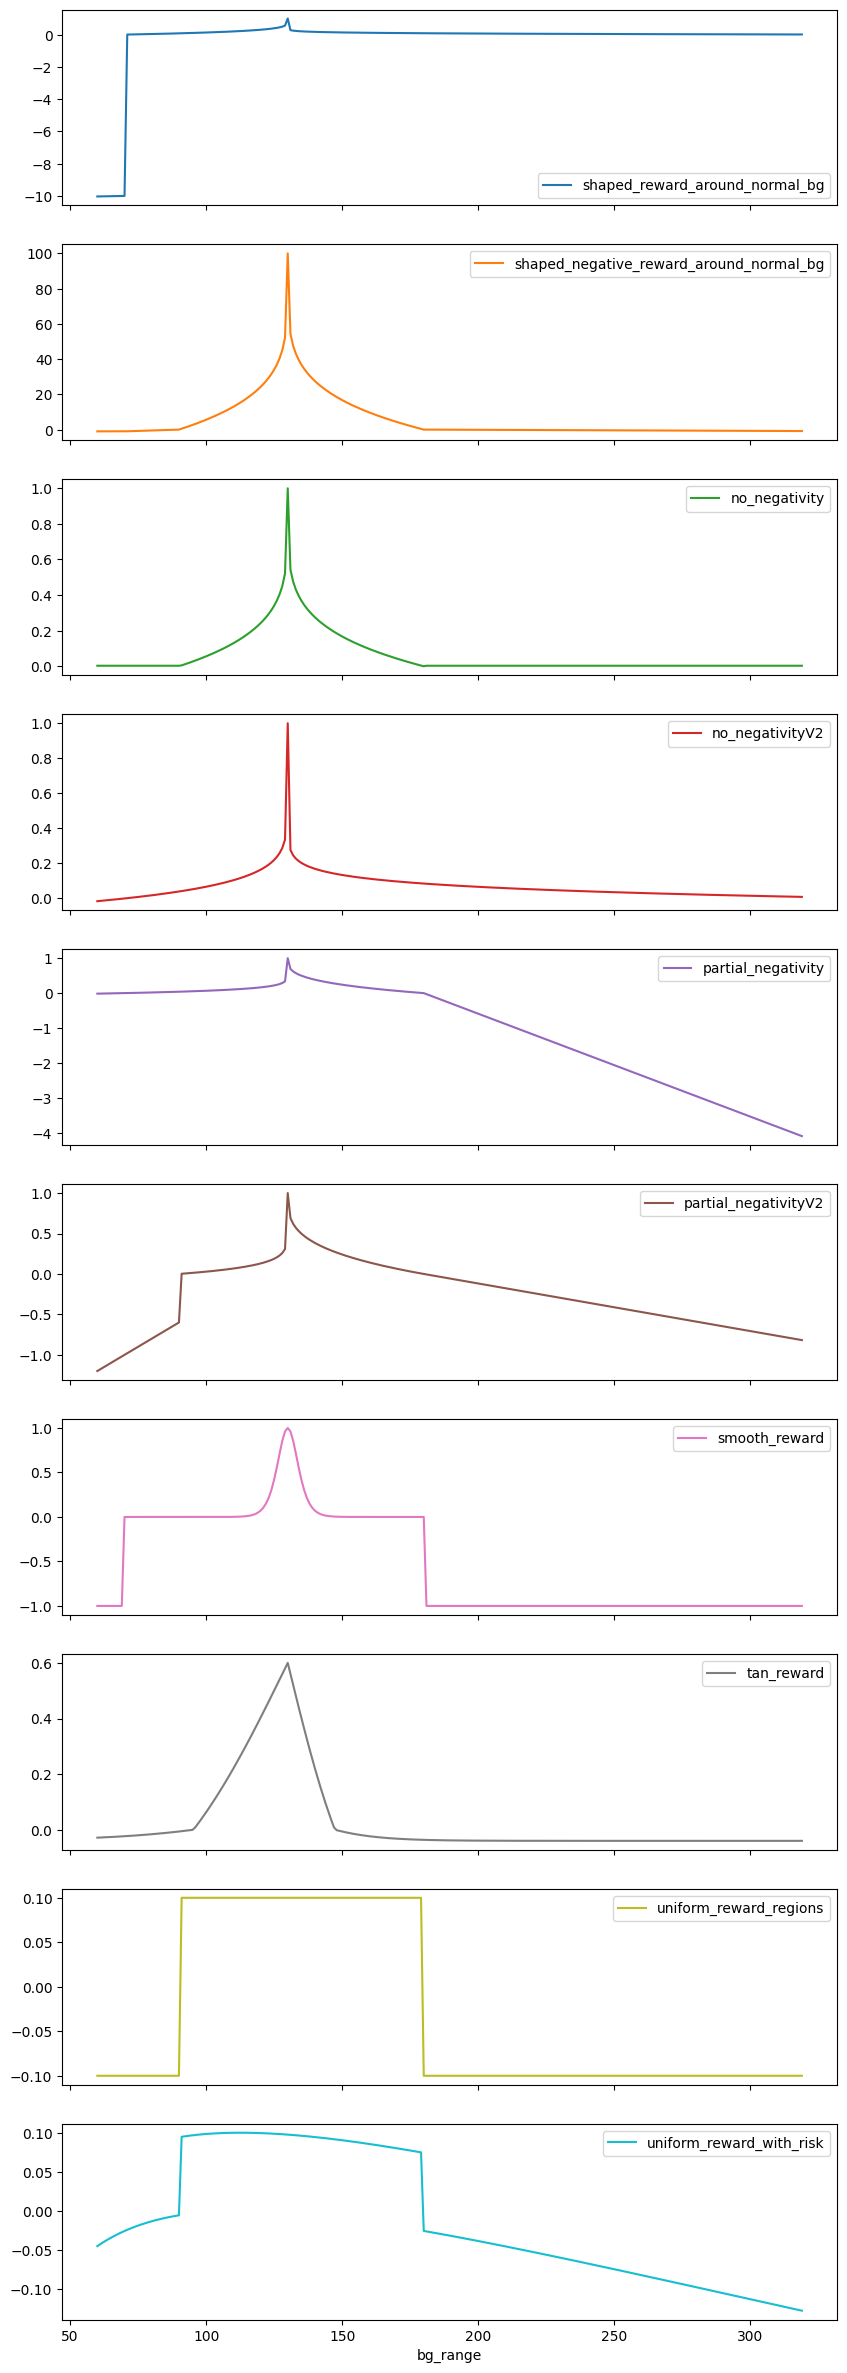

In [5]:
total_functions = len(reward_functions)

df.plot(subplots=True, figsize=(10,3*total_functions))
#fig, axes = plt.subplots(total_functions, 1, figsize=(10,5*total_functions))
